# T test and F test

### -> Ishan Gupta  
### -> Sagar Rathi  
### -> Sharad Khandelwal 
### -> Vaisakh Mahapatra

## T Test:
* T test (student t test) given by William Gosset in 1908.
* It is used to compare the means of 2 population. 
* It is a test of significance of regression coefficient in regression model.

## F Test :
* F test (Variance ratio test) given by Fisher in 1920s.
* It is a statistical test that determines the equality variance of two normal population and is used to compare variance of two population.

# Why use T test ?
## > To compare mean of two sample..

## Main Conditions :
### 1. Sample should be independent 
### 2. Samples must be normally distributed (Sharpio-wilk test).
### 3. Variance of group should be equal (F test). 

## Formula :
#### Classic T test

\begin{equation*}
t = \frac{m_A - m_B}{\sqrt{ \frac{S^2}{n_A} + \frac{S^2}{n_B} }}
\end{equation*}

* m = mean 
* n = size of group
* S^2 = pooled variance

#### Where S^2 can be given by:
\begin{equation*}
S^2 = \frac{\sum{(x-m_A)^2}+\sum{(x-m_B)^2}}{n_A+n_B-2}
\end{equation*}




### Code:

t.test(x, y, alternative = "two.sided", var.equal = FALSE)

* <strong>alternative:</strong> Hypothisis -> TwoSided, Greater, Less

* <strong> Var.equal :</strong> If variance equal use Classic formula or use welch formula

## Making DataFrame:

In [3]:
ww = c(38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.8, 48.5)
mw = c(67.8, 60, 63.4, 76, 89.4, 73.3, 67.3, 61.3, 62.4) 


df = data.frame( 
                gender = rep(c("Woman", "Man"), each = 9),
                w = c(ww,  mw)
                )
df

gender,w
Woman,38.9
Woman,61.2
Woman,73.3
Woman,21.8
Woman,63.4
Woman,64.6
Woman,48.4
Woman,48.8
Woman,48.5
Man,67.8


## Summary Of Data

In [4]:
## To using infix operator
library(dplyr)

df %>%
    group_by(gender) %>% 
    summarise(
            count=n(),
            mean=mean(w),
            sd=sd(w)
            )

gender,count,mean,sd
Man,9,68.98889,9.375426
Woman,9,52.10000,15.596714


## Visulaizing Data:

In [5]:
library(repr)
options(repr.plot.width=4,repr.plot.height=4)

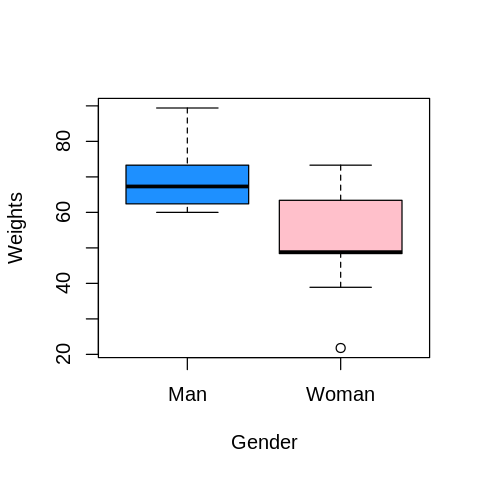

In [6]:
boxplot(w~gender, data=df, col=c("dodgerblue", "pink"),xlab="Gender",ylab="Weights")

## Checking assumption before start


### 1. Sample should be independent

### 2. Samples must be normally distributed (Sharpio-wilk test).


### Null hypothesis: They are same

In [7]:
shapiro.test(
    subset(df, df$gender=="Man")[,2] 
    )


	Shapiro-Wilk normality test

data:  subset(df, df$gender == "Man")[, 2]
W = 0.86425, p-value = 0.1066


In [8]:
shapiro.test(
    subset(df, df$gender=="Woman")[,2] 
    )


	Shapiro-Wilk normality test

data:  subset(df, df$gender == "Woman")[, 2]
W = 0.94266, p-value = 0.6101


### Results: They are independentt indeed

### 3. Variance of group should be equal (F test). 

### Null Hypothis:  variance is diffrent

In [9]:
var.test(w ~ gender, data=df)


	F test to compare two variances

data:  w by gender
F = 0.36134, num df = 8, denom df = 8, p-value = 0.1714
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.08150656 1.60191315
sample estimates:
ratio of variances 
         0.3613398 


### Results: variance are actually same

## Perform actual  T test now: 

### Null Hypothisis: Men & Woman have diffrent weights

In [10]:
t.test(w~gender, data =df, var.equal = T)


	Two Sample t-test

data:  w by gender
t = 2.7842, df = 16, p-value = 0.01327
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.029759 29.748019
sample estimates:
  mean in group Man mean in group Woman 
           68.98889            52.10000 


### Result: Women and Men have diffrent  weights